# Lab | Classification, Handling Imbalanced Data

## Scenario

You are working as an analyst for an internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

## Round 1
### 1. Import the required libraries and modules that you would need.

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

### 2. Read that data into Python and call the dataframe churnData.

In [15]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")
churnData.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


### 3. Check the datatypes of all the columns in the data.
You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [16]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [17]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors='coerce')
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

### 4. Check for null values in the dataframe. Replace the null values.

In [18]:
churnData.dropna(inplace = True)
churnData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   OnlineSecurity    7032 non-null   object 
 7   OnlineBackup      7032 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          7032 non-null   object 
 13  MonthlyCharges    7032 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7032 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

### 5. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Split the data into a training set and a test set.
- Scale the features either by using normalizer or a standard scaler.
- (Optional) Fit a logistic Regression model on the training data.
- Fit a Knn Classifier (NOT KnnRegressor please!) model on the training data.

In [19]:
# Creating a new dataframe with only the features that we are going to use.

df = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges", "Churn"]]
df.head(5)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,No
1,34,0,56.95,1889.50,No
2,2,0,53.85,108.15,Yes
3,45,0,42.30,1840.75,No
4,2,0,70.70,151.65,Yes


In [20]:
# Splitting the data into train and test.

X = df.drop(["Churn"], axis = 1)
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [21]:
# Scaling the features using standard scaler.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [22]:
# Fitting a logistic Regression model on the training data.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_s, y_train)

y_pred_train = model.predict(X_train_s)
y_pred_test = model.predict(X_test_s)

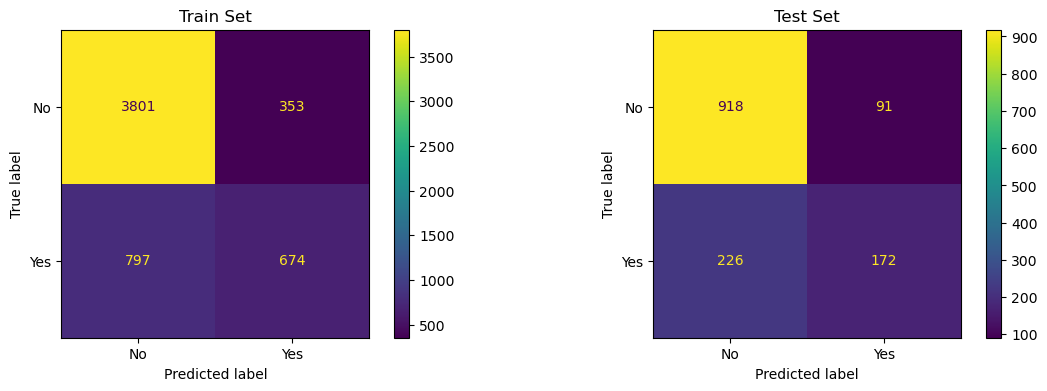

In [23]:
# Extra: printing the confusion matrix of the model.

fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_s,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_s,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

# Interpretating the confusion matrix

# Train set:
# 3837 true "No" (clients who didn't churn rightly predicted)
# 889 true "Yes" (clients who churned rightly predicted)
# 317 false "Yes" (the model predicted the clients would churn but they didn't)
# 582 false "No" (the model predicted the clients wouldn't churn but they did)

# Test set:
# 888 true "No"
# 179 true "Yes"
# 121 false "Yes"
# 219 false "No"



In [24]:
# Extra 2: analysing the performance of the model

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train, pos_label = "Yes"),
                                         recall_score(y_train, y_pred_train, pos_label = "Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test, pos_label = "Yes"),
                                        recall_score(y_test, y_pred_test, pos_label = "Yes")]})

display(performance)

,Error_metric,Train,Test
0,Accuracy,0.795556,0.774698
1,Precision,0.656280,0.653992
2,Recall,0.458192,0.432161


In [25]:
# Fitting a KNN Classifier model on the training data.

model = KNeighborsClassifier(n_neighbors=5,weights='uniform')
model.fit(X_train_s, y_train)

y_pred_train = model.predict(X_train_s)
y_pred_test = model.predict(X_test_s)

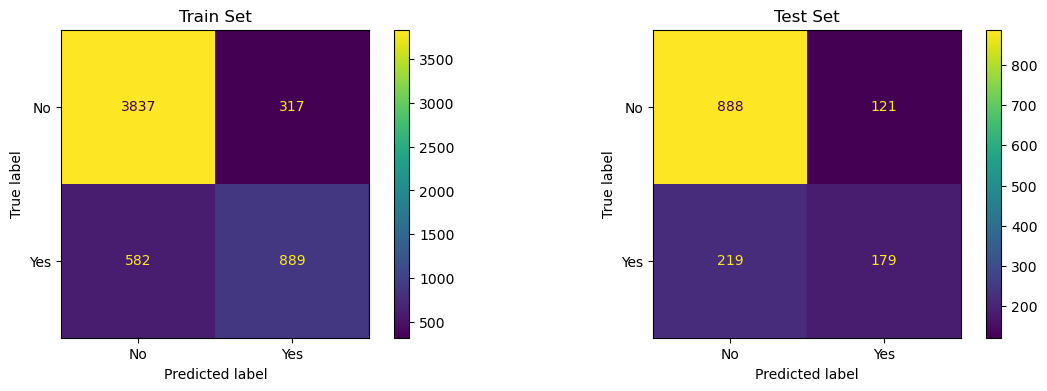

In [27]:
# Extra: printing the confusion matrix of the model.

fig, ax = plt.subplots(1, 2, figsize = (14,4))

plot_confusion_matrix(model, X_train_s, y_train, ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model, X_test_s, y_test, ax=ax[1], values_format = 'd')
ax[1].title.set_text("Test Set")

In [28]:
# Extra 2: analysing the performance of the model

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train, pos_label = "Yes"),
                                         recall_score(y_train, y_pred_train, pos_label = "Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test, pos_label = "Yes"),
                                        recall_score(y_test, y_pred_test, pos_label = "Yes")]})

display(performance)

,Error_metric,Train,Test
0,Accuracy,0.840178,0.758351
1,Precision,0.737148,0.596667
2,Recall,0.604351,0.449749


## Round 2

### 1. Fit a Decision Tree Classifier on the training data.


### 2. Check the accuracy on the test data.

## Round 3
### 1. Apply K-fold cross validation on your models before and check the model score.
Note: So far we have not balanced the data.

## Round 4
### 1. Fit a Random forest Classifier on the data and compare the accuracy.

### 2. Tune the hyper paramters with gridsearch and check the results.

## Managing imbalance in the dataset
### 1. Check for the imbalance.

### 2. Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

### 3. Each time fit the model and see how the accuracy of the model is.